# CNN on CIFAR-10


* define your first CNN architecture for CIFAR-10 dataset
* train it from scratch
* visualize learnt filters

CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="images/cifar10.jpg" style="width:80%">

# Import stuff

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [3]:
cd DeepLearning

/content/drive/MyDrive/DeepLearning


In [4]:
cd CIFAR_10_CNN

/content/drive/MyDrive/DeepLearning/CIFAR_10_CNN


In [5]:
import tensorflow as tf
import keras
import keras.utils
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)


2.5.0
2.5.0


# Load dataset

In [6]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [7]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [8]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

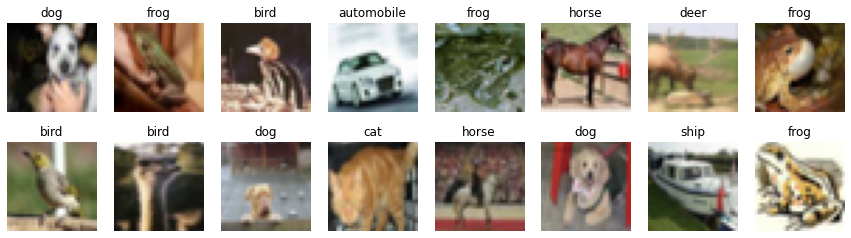

In [9]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

# Prepare data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

We need to convert class labels to one-hot encoded vectors. Use __keras.utils.to_categorical__.

In [10]:
# normalize inputs
x_train2 =(x_train/255)-0.5 ### YOUR CODE HERE
x_test2 =(x_test/255)-0.5 ### YOUR CODE HERE
from tensorflow.keras import utils as np_utils

# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = np_utils.to_categorical(y_train, 10)### YOUR CODE HERE
y_test2 = np_utils.to_categorical(y_test, 10)### YOUR CODE HERE


# Define CNN architecture

In [11]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

You need to define a model which takes __(None, 32, 32, 3)__ input and predicts __(None, 10)__ output with probabilities for all classes. __None__ in shapes stands for batch dimension.

Simple feed-forward networks in Keras can be defined in the following way:

```python
model = Sequential()  # start feed-forward model definition
model.add(Conv2D(..., input_shape=(32, 32, 3)))  # first layer needs to define "input_shape"

...  # here comes a bunch of convolutional, pooling and dropout layers

model.add(Dense(NUM_CLASSES))  # the last layer with neuron for each class
model.add(Activation("softmax"))  # output probabilities
```

Stack __4__ convolutional layers with kernel size __(3, 3)__ with growing number of filters __(16, 32, 32, 64)__, use "same" padding.

Add __2x2__ pooling layer after every 2 convolutional layers (conv-conv-pool scheme).

Use __LeakyReLU__ activation with recommended parameter __0.1__ for all layers that need it (after convolutional and dense layers):
```python
model.add(LeakyReLU(0.1))
```

Add a dense layer with __256__ neurons and a second dense layer with __10__ neurons for classes. Remember to use __Flatten__ layer before first dense layer to reshape input volume into a flat vector!

Add __Dropout__ after every pooling layer (__0.25__) and between dense layers (__0.5__).

In [12]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(kernel_size=(3,3), input_shape=(32, 32, 3),filters=16,padding="same"))  # the first layer must specify the input shape (replacing placeholders)
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(kernel_size=(3,3), input_shape=(32, 32, 3),filters=32,padding="same")) 
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(Conv2D(kernel_size=(3,3), input_shape=(32, 32, 3),filters=32,padding="same"))  
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(kernel_size=(3,3), input_shape=(32, 32, 3),filters=64,padding="same"))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dense(NUM_CLASSES))
    model.add(Activation('softmax'))
  
    return model

In [13]:

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

# Train model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [14]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

#s = reset_tf_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(learning_rate=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

Training takes approximately **1.5 hours**. You're aiming for ~0.80 validation accuracy.

In [15]:
filepath="weights-improvement-{epoch:02d}.hdf5"
last_finished_epoch = None

#last_finished_epoch = 298    
#model.load_weights(filepath.format(epoch=last_finished_epoch))

In [ ]:
# we will save model checkpoints to continue training in case of kernel death
'''
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
#from keras.models import load_model
#s = reset_tf_session()
#last_finished_epoch = 10       
#model = load_model(model_filename.format(last_finished_epoch))
'''

In [16]:
pip install -U tensorflow-addons

     |████████████████████████████████| 686kB 2.8MB/s 


In [17]:
import tensorflow_addons as tfa
import keras.utils
from keras.callbacks import ModelCheckpoint

from numpy import loadtxt

In [18]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
last_finished_epoch=None


history=model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               tfa.callbacks.TQDMProgressBar(),
               checkpoint
               ],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
   )
model.save("model.h5")
print("Saved model to disk")



Learning rate: 0.005
Epoch 1/10




Epoch 00001: val_accuracy improved from -inf to 0.63650, saving model to weights-improvement-01.hdf5
Learning rate: 0.0045
Epoch 2/10




Epoch 00002: val_accuracy improved from 0.63650 to 0.70890, saving model to weights-improvement-02.hdf5
Learning rate: 0.00405
Epoch 3/10




Epoch 00003: val_accuracy improved from 0.70890 to 0.74350, saving model to weights-improvement-03.hdf5
Learning rate: 0.003645
Epoch 4/10




Epoch 00004: val_accuracy did not improve from 0.74350
Learning rate: 0.0032805
Epoch 5/10




Epoch 00005: val_accuracy improved from 0.74350 to 0.76510, saving model to weights-improvement-05.hdf5
Learning rate: 0.00295245
Epoch 6/10




Epoch 00006: val_accuracy improved from 0.76510 to 0.77540, saving model to weights-improvement-06.hdf5
Learning rate: 0.002657205
Epoch 7/10




Epoch 00007: val_accuracy improved from 0.77540 to 0.79610, saving model to weights-improvement-07.hdf5
Learning rate: 0.0023914846
Epoch 8/10




Epoch 00008: val_accuracy did not improve from 0.79610
Learning rate: 0.002152336
Epoch 9/10




Epoch 00009: val_accuracy did not improve from 0.79610
Learning rate: 0.0019371024
Epoch 10/10




Epoch 00010: val_accuracy improved from 0.79610 to 0.80100, saving model to weights-improvement-10.hdf5

Saved model to disk


NameError: ignored

In [20]:
import pandas as pd
history_df=pd.DataFrame(history.history)
history_df.to_csv('History2.csv')

   Unnamed: 0      loss  accuracy  val_loss  val_accuracy        lr
0           0  1.355631   0.51002  1.017616        0.6365  0.005000
1           1  0.964257   0.66104  0.838391        0.7089  0.004500
2           2  0.822291   0.71168  0.739476        0.7435  0.004050
3           3  0.735930   0.74026  0.746116        0.7371  0.003645
4           4  0.666972   0.76570  0.693445        0.7651  0.003280


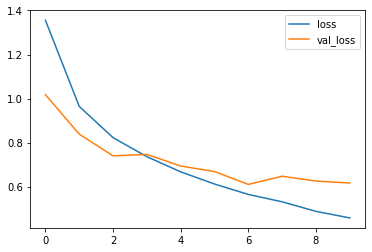

In [21]:
history_df=pd.read_csv('History2.csv')
history_df.loc[:,['loss','val_loss']].plot()
print(history_df.head())

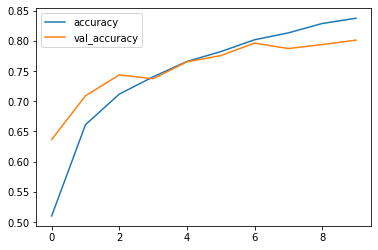

In [22]:
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
'''
last_finished_epoch = 43   
model.load_weights(filepath.format(epoch=last_finished_epoch))
'''


# Evaluate model

In [24]:
# make test predictions

y_pred_test = model.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

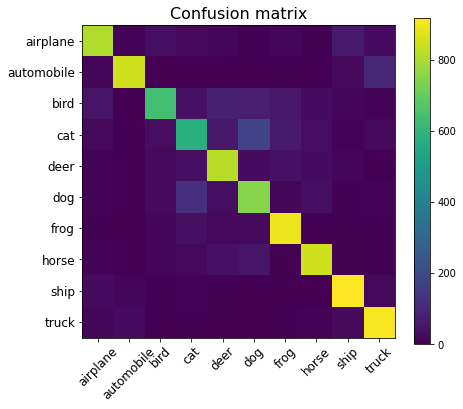

Test accuracy: 0.801


In [25]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

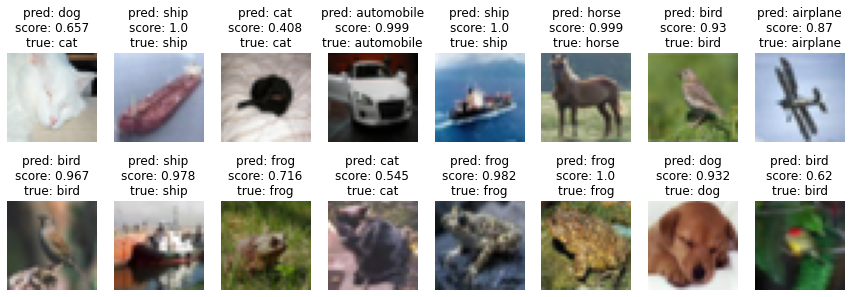

In [26]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

That's it! Congratulations!

What you've done:
- defined CNN architecture
- trained your model
- evaluated your model
